In [1]:
from ecmwfapi import *
import earthkit.data
import earthkit.plots

# ECMWFAPI for Mars WebAPI retrievals

## [Web API Documentation](https://confluence.ecmwf.int/display/WEBAPI/ECMWF+Web+API+Home)

In [32]:
server = ECMWFService("mars")

request = {
    "class": "od",
    "date": "-1",
    "expver": "1",
    "param": 140120,
    "step": "12",
    "stream": "wave",
    "time": "00",
    "type": "fc",
    "grid": "0.25/0.25", # interpolation done on client
    "area": "55/-15/34.0/5.0",  #+N, -W, -S, +E
    'format' : "netcdf" # not fully supported, wont work for all fields, only available from webapi. Larger than grib!
    # they can also convert with eccodes on local machine. Can also be done on mars catalogue
}
server.execute(request, "data/target.nc")

2025-10-13 20:34:54 ECMWF API python library 1.6.5
2025-10-13 20:34:54 ECMWF API at https://api.ecmwf.int/v1
2025-10-13 20:34:54 Welcome Alice Sartori Monteiro de Barros
2025-10-13 20:34:55 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-13 20:34:55 Request submitted
2025-10-13 20:34:55 Request id: 68ed626faed02ba30607054c
2025-10-13 20:34:55 Request is submitted
2025-10-13 20:34:56 Request is active
2025-10-13 20:35:12 Calling 'nice mars /tmp/20251013-2030/10/tmp-_mars-1oaC1C-57d8d50431ea42f4edec5a83d8accf3f.req'
2025-10-13 20:35:12 Forcing MIR_CACHE_PATH=/data/ec_coeff
2025-10-13 20:35:12 mars - WARN -
2025-10-13 20:35:12 mars - WARN -
2025-10-13 20:35:12 MIR environment variables:
2025-10-13 20:35:12 MIR_CACHE_PATH=/data/ec_coeff
2025-10-13 20:35:12 MIR_LSM_NAMED=1km.climate.v013
2025-10-13 20:35:12 Using MARS binary: /usr/local/apps/mars/versions/6.33.24.5/bin/mars.bin
2025-10-13 20:35:12 mars - INFO

In [33]:
fs = earthkit.data.from_source("file", "data/target.nc")

In [34]:
fx = fs.to_xarray()

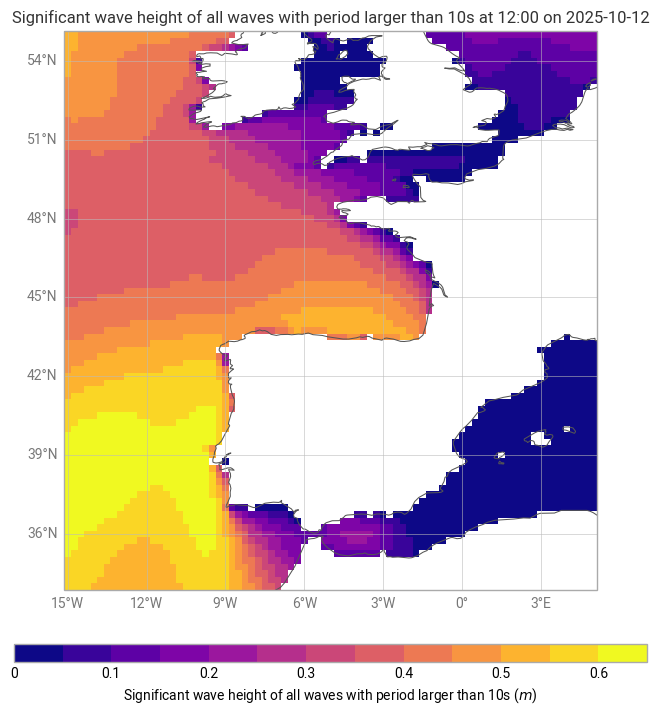

In [39]:
chart = earthkit.plots.Map()
chart.grid_cells(
    fx
)
chart.legend()
chart.title()
chart.coastlines()
chart.gridlines()
chart.show()

# Public Datasets

In [ ]:
https://apps.ecmwf.int/datasets/]

In [4]:
from ecmwfapi import ECMWFDataServer

# To run this example, you need an API key
# available from https://api.ecmwf.int/v1/key/

server = ECMWFDataServer()
server.retrieve({
    'origin'    : "ecmf",
    'levtype'   : "sfc",
    'number'    : "1",
    'expver'    : "prod",
    'dataset'   : "tigge",
    'step'      : "0/to/72",
    "area" : "80/60/10/170",
    'grid'      : "0.25/0.25",
    'param'     : "167",
    # 'time'      : "00/12",
    'date'      : "2025-10-10",
    'type'      : "pf",
    'class'     : "ti",
    'target'    : "data/tigge.grib"
})

2025-10-13 20:59:04 ECMWF API python library 1.6.5
2025-10-13 20:59:04 ECMWF API at https://api.ecmwf.int/v1
2025-10-13 20:59:05 Welcome Alice Sartori Monteiro de Barros
2025-10-13 20:59:05 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2025-10-13 20:59:05 ------------ WARNING ------------
2025-10-13 20:59:05 Access to this dataset is transitioning to a new interface, dates to be announced soon
2025-10-13 20:59:05 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2025-10-13 20:59:05 ---------------------------------
2025-10-13 20:59:05 Request submitted
2025-10-13 20:59:05 Request id: 68ed681984073a638106fb81
2025-10-13 20:59:05 Request is submitted
2025-10-13 20:59:06 Request is active
2025-10-13 20:59:11 Calling 'nice mars /tmp/20251013-2050/93/tmp-_mars-bTxXF0-2ad2aa3f45976ede1efa0f8f34ebfb21.req'
2025-10-13 20:59:11 Forcing MIR_CACHE_PATH=/data/ec_coe

In [5]:
ds = earthkit.data.from_source("file", "data/tigge.grib")

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


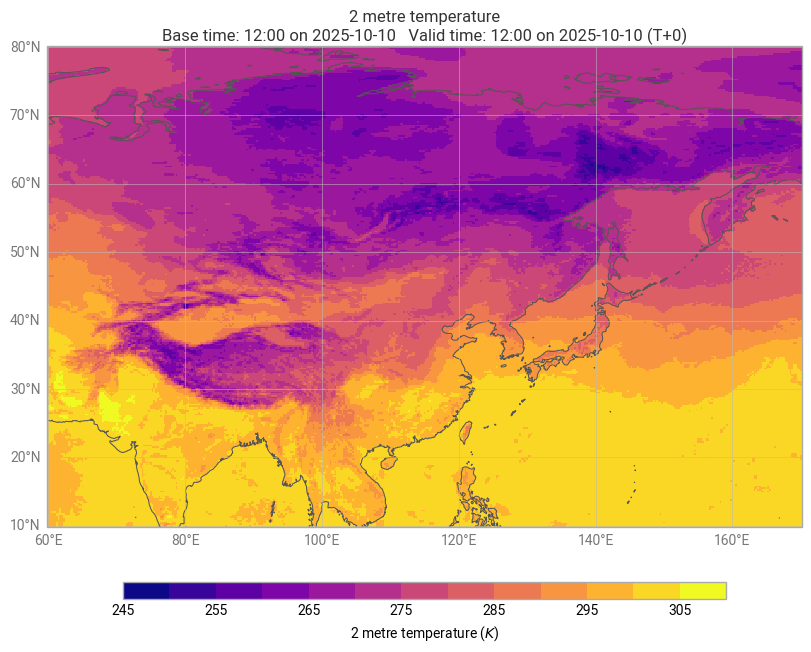

In [6]:
chart = earthkit.plots.Map()
chart.grid_cells(
    ds[0]
)
chart.legend()
chart.title()
chart.coastlines()
# chart.ocean(color="white")
chart.gridlines()
chart.show()